<a href="https://colab.research.google.com/github/freha-mezzoudj/Fast-Computation/blob/main/store_fastFood_Image_cnnV2_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from zipfile import ZipFile
file_name = "logoDataFastFood.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019) 
import time

In [5]:
!pip install ipython ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [ ]:
%load_ext autotime

#Classification Code 

https://github.com/chetanstpt/Fast-food-Image-detection/blob/main/FastFoodStore_Classification_CNN_Final%20(1).ipynb

#CNN Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), # Flattening transforms a two-dimensional matrix of features into a vector of features           
    
    tf.keras.layers.Dense(550,activation="relu"), #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax") #Adding the Output Layer
])


In [ ]:
%unload_ext autotime

The Summary of the model: 

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

The paramters of the model:

In [8]:
%%time
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

adam=Adam(lr=0.001)
model.compile(optimizer='adam',   #Optimiser  used to reduce the cost calculated by cross-entropy
              loss='categorical_crossentropy', #the loss function used to calculate the error
              metrics = ['acc'])     #the metrics used to represent the efficiency of the model


CPU times: user 17.3 ms, sys: 0 ns, total: 17.3 ms
Wall time: 18.3 ms


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training and validation data:

In [9]:
%%time
bs=30         #Setting batch size
    
train_dir = "logoDataFastFood/train/"  #Setting training directory
validation_dir = "logoDataFastFood/test/"  #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=bs,
                                                    class_mode='categorical',
                                                    target_size=(180,180))     

# Flow validation images in batches of 20 using test_datagen generator

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))


Found 1465 images belonging to 5 classes.
Found 893 images belonging to 5 classes.
CPU times: user 114 ms, sys: 40.5 ms, total: 154 ms
Wall time: 125 ms


Fitting the model:

In [16]:
%%time
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=50,
                    validation_steps=50 // bs,
                    verbose=2)


Epoch 1/50
5/5 - 7s - loss: 0.0678 - acc: 0.9867 - val_loss: 1.9647 - val_acc: 0.7333 - 7s/epoch - 1s/step
Epoch 2/50
5/5 - 6s - loss: 0.1155 - acc: 0.9600 - val_loss: 1.8297 - val_acc: 0.7667 - 6s/epoch - 1s/step
Epoch 3/50
5/5 - 6s - loss: 0.0873 - acc: 0.9667 - val_loss: 0.6968 - val_acc: 0.7333 - 6s/epoch - 1s/step
Epoch 4/50
5/5 - 6s - loss: 0.0229 - acc: 1.0000 - val_loss: 1.7500 - val_acc: 0.7333 - 6s/epoch - 1s/step
Epoch 5/50
5/5 - 6s - loss: 0.1640 - acc: 0.9733 - val_loss: 2.0971 - val_acc: 0.6667 - 6s/epoch - 1s/step
Epoch 6/50
5/5 - 6s - loss: 0.1727 - acc: 0.9600 - val_loss: 1.3794 - val_acc: 0.8000 - 6s/epoch - 1s/step
Epoch 7/50
5/5 - 6s - loss: 0.1406 - acc: 0.9667 - val_loss: 2.0601 - val_acc: 0.7667 - 6s/epoch - 1s/step
Epoch 8/50
5/5 - 6s - loss: 0.1977 - acc: 0.9586 - val_loss: 1.4591 - val_acc: 0.7333 - 6s/epoch - 1s/step
Epoch 9/50
5/5 - 6s - loss: 0.2398 - acc: 0.9267 - val_loss: 0.4826 - val_acc: 0.9000 - 6s/epoch - 1s/step
Epoch 10/50
5/5 - 8s - loss: 0.0930 -

Try with other parametrs!

In [11]:
model.save('Final_model_cpu_cnnV2.h5')

In [17]:
import pandas as pd
lc = pd.DataFrame(history.history)
lc

,loss,acc,val_loss,val_acc
0,0.067792,0.986667,1.964748,0.733333
1,0.115486,0.960000,1.829746,0.766667
2,0.087285,0.966667,0.696815,0.733333
3,0.022925,1.000000,1.750000,0.733333
4,0.164013,0.973333,2.097096,0.666667
5,0.172685,0.960000,1.379358,0.800000
6,0.140563,0.966667,2.060129,0.766667
7,0.197671,0.958621,1.459145,0.733333
8,0.239825,0.926667,0.482558,0.900000
9,0.092982,0.980000,0.829848,0.733333


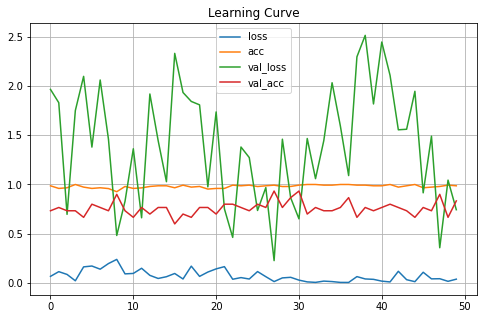

In [18]:
lc.plot(figsize=(8,5))
plt.title("Learning Curve")
plt.grid()